In [8]:
import numpy as np
from matplotlib import pyplot
from scipy import linalg
import copy
import iMPS
from scipy.sparse import linalg
import funcs
import time

In [18]:
X = np.array([[0,1],[1,0]])
Id = np.eye(2)
X1234 = np.zeros([1,1,16,16])
X1234[0,0,:,:] = np.kron(X,np.kron(X,np.kron(X,X)))
X12 = np.zeros([1,1,16,16])
X12[0,0,:,:] = np.kron(X,np.kron(X,np.kron(Id,Id)))

X14= np.zeros([1,1,16,16])
X14[0,0,:,:] = np.kron(X,np.kron(Id,np.kron(Id,X)))

X13= np.zeros([1,1,16,16])
X13[0,0,:,:] = np.kron(X,np.kron(Id,np.kron(X,Id)))

X1 = np.zeros([1,1,16,16])
X1[0,0,:,:] = np.kron(X,np.kron(Id,np.kron(Id,Id)))


MPO1234 = iMPS.iMPO()
MPO1234.construct_from_tensor_list([X1234,X1234])

MPO14 = iMPS.iMPO()
MPO14.construct_from_tensor_list([X14,X14])

MPO13 = iMPS.iMPO()
MPO13.construct_from_tensor_list([X13,X13])

MPO12 = iMPS.iMPO()
MPO12.construct_from_tensor_list([X12,X12])

MPO1 = iMPS.iMPO()
MPO1.construct_from_tensor_list([X1,X1])



Z = np.array([[0,1],[1,0]])
Z1234 = np.zeros([1,1,16,16])
Z1234[0,0,:,:] = np.kron(Z,np.kron(Z,np.kron(Z,Z)))
Z12 = np.zeros([1,1,16,16])
Z12[0,0,:,:] = np.kron(Z,np.kron(Z,np.kron(Id,Id)))

Z14= np.zeros([1,1,16,16])
Z14[0,0,:,:] = np.kron(Z,np.kron(Id,np.kron(Id,Z)))

Z13= np.zeros([1,1,16,16])
Z13[0,0,:,:] = np.kron(Z,np.kron(Id,np.kron(Z,Id)))

Z1 = np.zeros([1,1,16,16])
Z1[0,0,:,:] = np.kron(Z,np.kron(Id,np.kron(Id,Id)))


MPOZ1234 = iMPS.iMPO()
MPOZ1234.construct_from_tensor_list([Z1234,Z1234])

MPOZ14 = iMPS.iMPO()
MPOZ14.construct_from_tensor_list([Z14,Z14])

MPOZ13 = iMPS.iMPO()
MPOZ13.construct_from_tensor_list([Z13,Z13])

MPOZ12 = iMPS.iMPO()
MPOZ12.construct_from_tensor_list([Z12,Z12])

MPOZ1 = iMPS.iMPO()
MPOZ1.construct_from_tensor_list([Z1,Z1])

dephasing channel

In [3]:
eigs=[]
lam1s=[]
lam12s=[]
lam13s=[]
lam14s=[]
lam1234s=[]
dims=[]

Z = np.array([[1,0],[0,-1]])
B = np.zeros([1,1,16])
B[0,0] =(linalg.expm(0.1*np.kron(Z,Z))).reshape([16,])
MPS = iMPS.iMPS()
MPS.svd_threshold =1e-10
MPS.max_bond = 15
MPS.construct_from_tensor_list([B,B])

rng = np.arange(0,1.01,0.05)
for p in rng:   
    
 
    
    trans = funcs.single_trans_2layers(p1=p,channel1='dephasing',p2=0,channel2='dephasing')
    #trans = funcs.single_trans_qc(p,'dephasing')
    MPO = iMPS.iMPO()
    MPO.construct_from_tensor_list([trans,trans])

    MPS_power2 = iMPS.MPS_power_method_twosite(MPS,MPO,max_bond=15)
    MPS_power2.update(100,1e-5,1e-6)  
    
    dims.append(MPS_power2.MPS2.chi[0])
    
    strap = iMPS.strap(MPS_power2.MPS2,MPO12,MPS_power2.MPS2)
    lam12 = strap.calculate_eig()
    
    strap = iMPS.strap(MPS_power2.MPS2,MPO13,MPS_power2.MPS2)
    lam13 = strap.calculate_eig()
    
   
    strap = iMPS.strap(MPS_power2.MPS2,MPO14,MPS_power2.MPS2)
    lam14 = strap.calculate_eig()
    
    strap = iMPS.strap(MPS_power2.MPS2,MPO1234,MPS_power2.MPS2)
    lam1234 = strap.calculate_eig()
    
    strap = iMPS.strap(MPS_power2.MPS2,MPO1,MPS_power2.MPS2)
    lam1 = strap.calculate_eig()
    
   
    lam12s.append(lam12)
    lam13s.append(lam13)
    lam14s.append(lam14)
    lam1234s.append(lam1234)
    lam1s.append(lam1)
    print(p)

0.0
0.05
0.1
0.15000000000000002
0.2
0.25
0.30000000000000004
0.35000000000000003
0.4
0.45
0.5
0.55
0.6000000000000001
0.65
0.7000000000000001
0.75
0.8
0.8500000000000001
0.9
0.9500000000000001
1.0


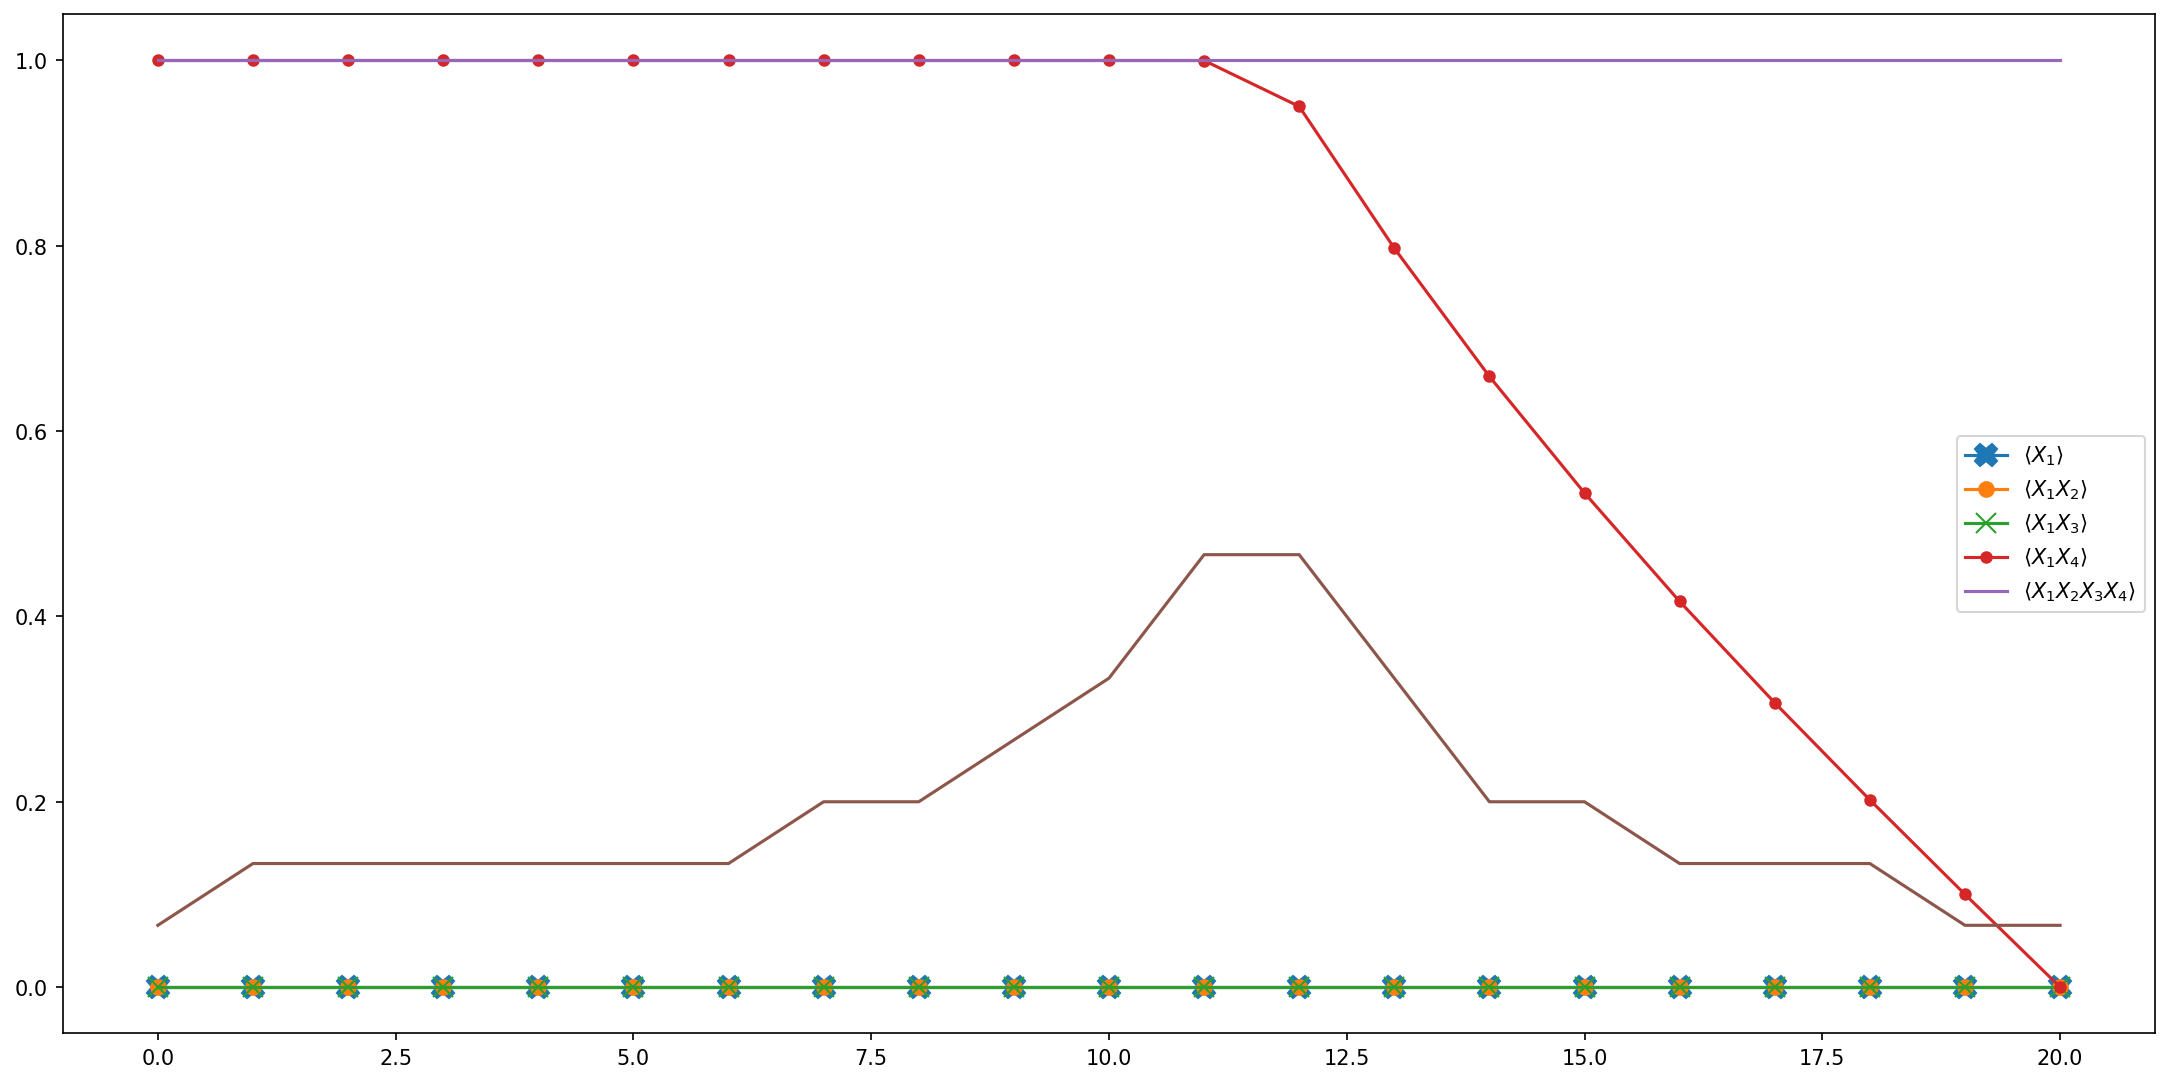

In [4]:
pyplot.figure(figsize=(18,9),dpi = 150)
pyplot.plot(np.abs(lam1s),'X-',label = '$\langle X_1\\rangle$',markersize=11)
pyplot.plot(np.abs(lam12s),'o-',label = '$\langle X_1X_2 \\rangle$',markersize=7)
pyplot.plot(np.abs(lam13s),'x-',label = '$\langle X_1X_3\\rangle$',markersize=10)
pyplot.plot(np.abs(lam14s),'.-',label = '$\langle X_1X_4\\rangle$',markersize=10)
pyplot.plot(np.abs(lam1234s),label = '$\langle X_1X_2X_3X_4\\rangle$')
pyplot.plot(np.array(dims)/15)
pyplot.legend()
pyplot.show()

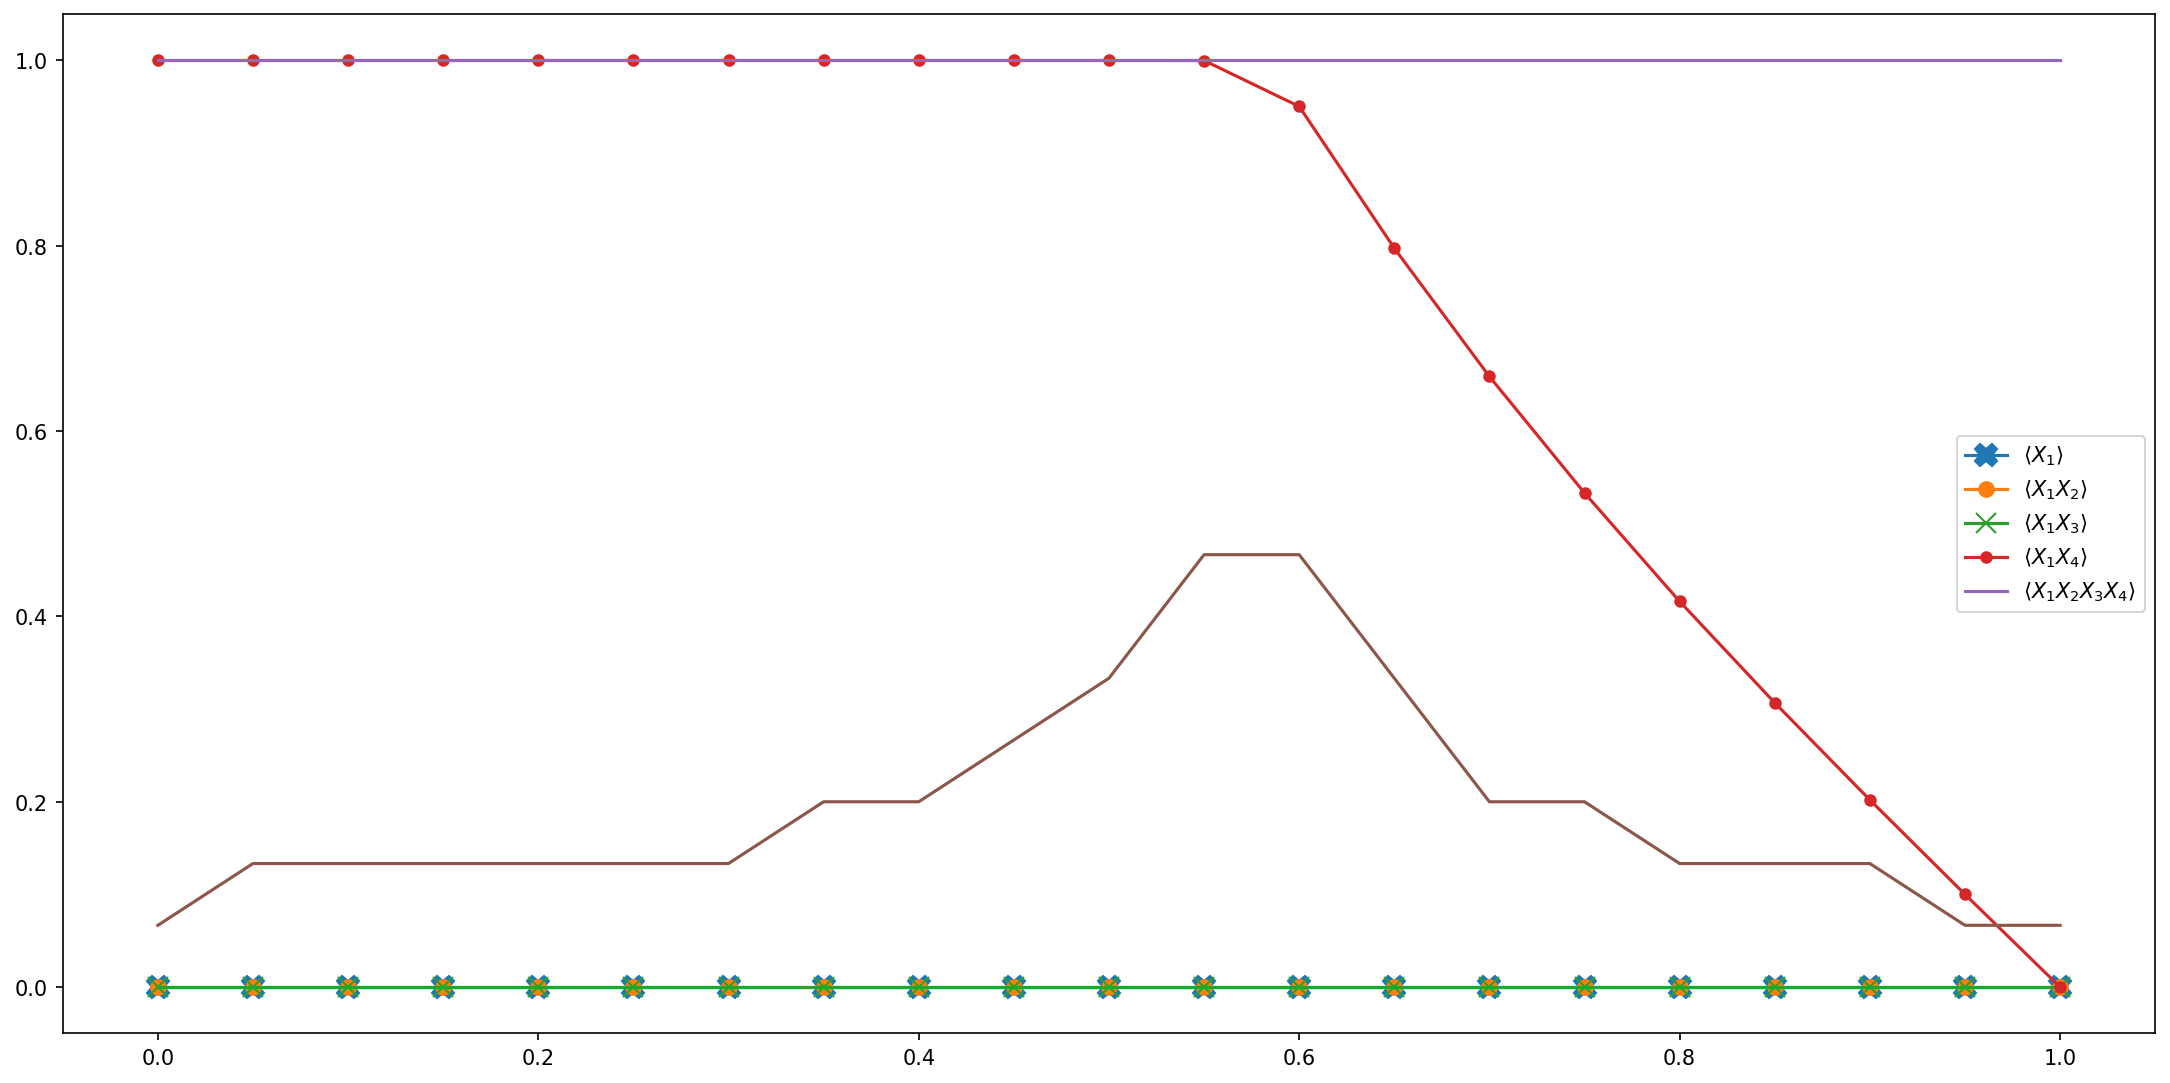

In [5]:
pyplot.figure(figsize=(18,9),dpi = 150)
pyplot.plot(rng,np.abs(lam1s),'X-',label = '$\langle X_1\\rangle$',markersize=11)
pyplot.plot(rng,np.abs(lam12s),'o-',label = '$\langle X_1X_2 \\rangle$',markersize=7)
pyplot.plot(rng,np.abs(lam13s),'x-',label = '$\langle X_1X_3\\rangle$',markersize=10)
pyplot.plot(rng,np.abs(lam14s),'.-',label = '$\langle X_1X_4\\rangle$',markersize=10)
pyplot.plot(rng,np.abs(lam1234s),label = '$\langle X_1X_2X_3X_4\\rangle$')
pyplot.plot(rng,np.array(dims)/15)
pyplot.legend()
pyplot.show()

X flip

In [22]:
eigs=[]
lam1s=[]
lam12s=[]
lam13s=[]
lam14s=[]
lam1234s=[]

lamZ1s=[]
lamZ12s=[]
lamZ13s=[]
lamZ14s=[]
lamZ1234s=[]
dims=[]

Z = np.array([[1,0],[0,-1]])
B = np.zeros([1,1,16])
B[0,0] =(linalg.expm(0.1*np.kron(Z,Z))).reshape([16,])
MPS = iMPS.iMPS()
MPS.svd_threshold =1e-10
MPS.max_bond = 15
MPS.construct_from_tensor_list([B,B])

rng = np.arange(0,0.51,0.01)
for p in rng:   
    
 
    
    #trans = funcs.single_trans_qc(p,'x_flip')
    trans = funcs.single_trans_2layers(p1=0,channel1='x_flip',p2=p,channel2='x_flip')
    MPO = iMPS.iMPO()
    MPO.construct_from_tensor_list([trans,trans])

    MPS_power2 = iMPS.MPS_power_method_twosite(MPS,MPO,max_bond=15)
    MPS_power2.update(100,1e-5)  
    
    dims.append(MPS_power2.MPS2.chi[0])
    
    strap = iMPS.strap(MPS_power2.MPS2,MPO12,MPS_power2.MPS2)
    lam12 = strap.calculate_eig()
    
    strap = iMPS.strap(MPS_power2.MPS2,MPO13,MPS_power2.MPS2)
    lam13 = strap.calculate_eig()
    
   
    strap = iMPS.strap(MPS_power2.MPS2,MPO14,MPS_power2.MPS2)
    lam14 = strap.calculate_eig()
    
    strap = iMPS.strap(MPS_power2.MPS2,MPO1234,MPS_power2.MPS2)
    lam1234 = strap.calculate_eig()
    
    strap = iMPS.strap(MPS_power2.MPS2,MPO1,MPS_power2.MPS2)
    lam1 = strap.calculate_eig()
    
   
    lam12s.append(lam12)
    lam13s.append(lam13)
    lam14s.append(lam14)
    lam1234s.append(lam1234)
    lam1s.append(lam1)
    
    strap = iMPS.strap(MPS_power2.MPS2,MPOZ12,MPS_power2.MPS2)
    lam12 = strap.calculate_eig()
    
    strap = iMPS.strap(MPS_power2.MPS2,MPOZ13,MPS_power2.MPS2)
    lam13 = strap.calculate_eig()
    
   
    strap = iMPS.strap(MPS_power2.MPS2,MPOZ14,MPS_power2.MPS2)
    lam14 = strap.calculate_eig()
    
    strap = iMPS.strap(MPS_power2.MPS2,MPOZ1234,MPS_power2.MPS2)
    lam1234 = strap.calculate_eig()
    
    strap = iMPS.strap(MPS_power2.MPS2,MPOZ1,MPS_power2.MPS2)
    lam1 = strap.calculate_eig()
    
   
    lamZ12s.append(lam12)
    lamZ13s.append(lam13)
    lamZ14s.append(lam14)
    lamZ1234s.append(lam1234)
    lamZ1s.append(lam1)
    print(p)


0.0
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35000000000000003
0.36
0.37
0.38
0.39
0.4
0.41000000000000003
0.42
0.43
0.44
0.45
0.46
0.47000000000000003
0.48
0.49
0.5


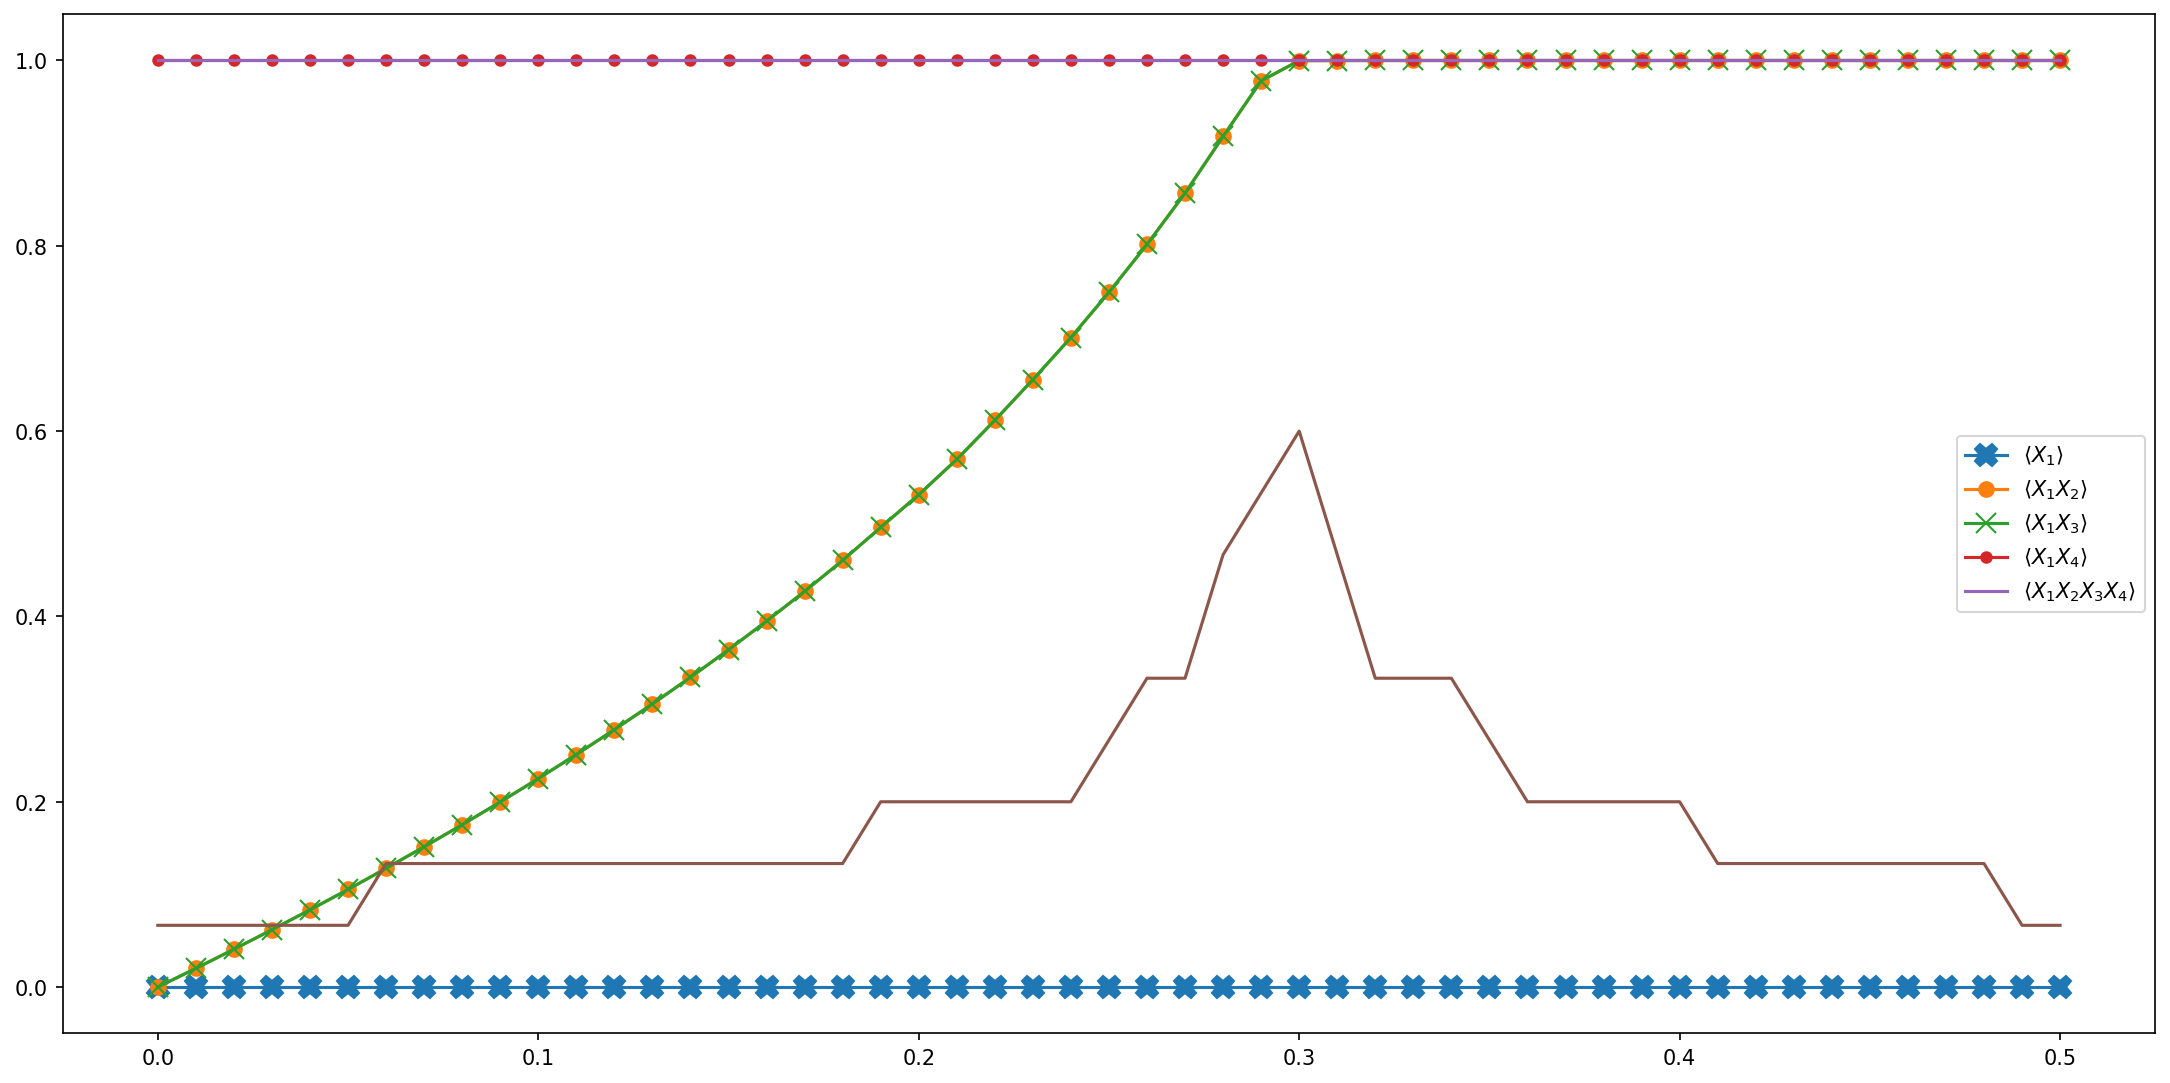

In [23]:
pyplot.figure(figsize=(18,9),dpi = 150)
pyplot.plot(rng,np.abs(lam1s),'X-',label = '$\langle X_1\\rangle$',markersize=11)
pyplot.plot(rng,np.abs(lam12s),'o-',label = '$\langle X_1X_2 \\rangle$',markersize=7)
pyplot.plot(rng,np.abs(lam13s),'x-',label = '$\langle X_1X_3\\rangle$',markersize=10)
pyplot.plot(rng,np.abs(lam14s),'.-',label = '$\langle X_1X_4\\rangle$',markersize=10)
pyplot.plot(rng,np.abs(lam1234s),label = '$\langle X_1X_2X_3X_4\\rangle$')
pyplot.plot(rng,np.array(dims)/15)
pyplot.legend()
pyplot.show()

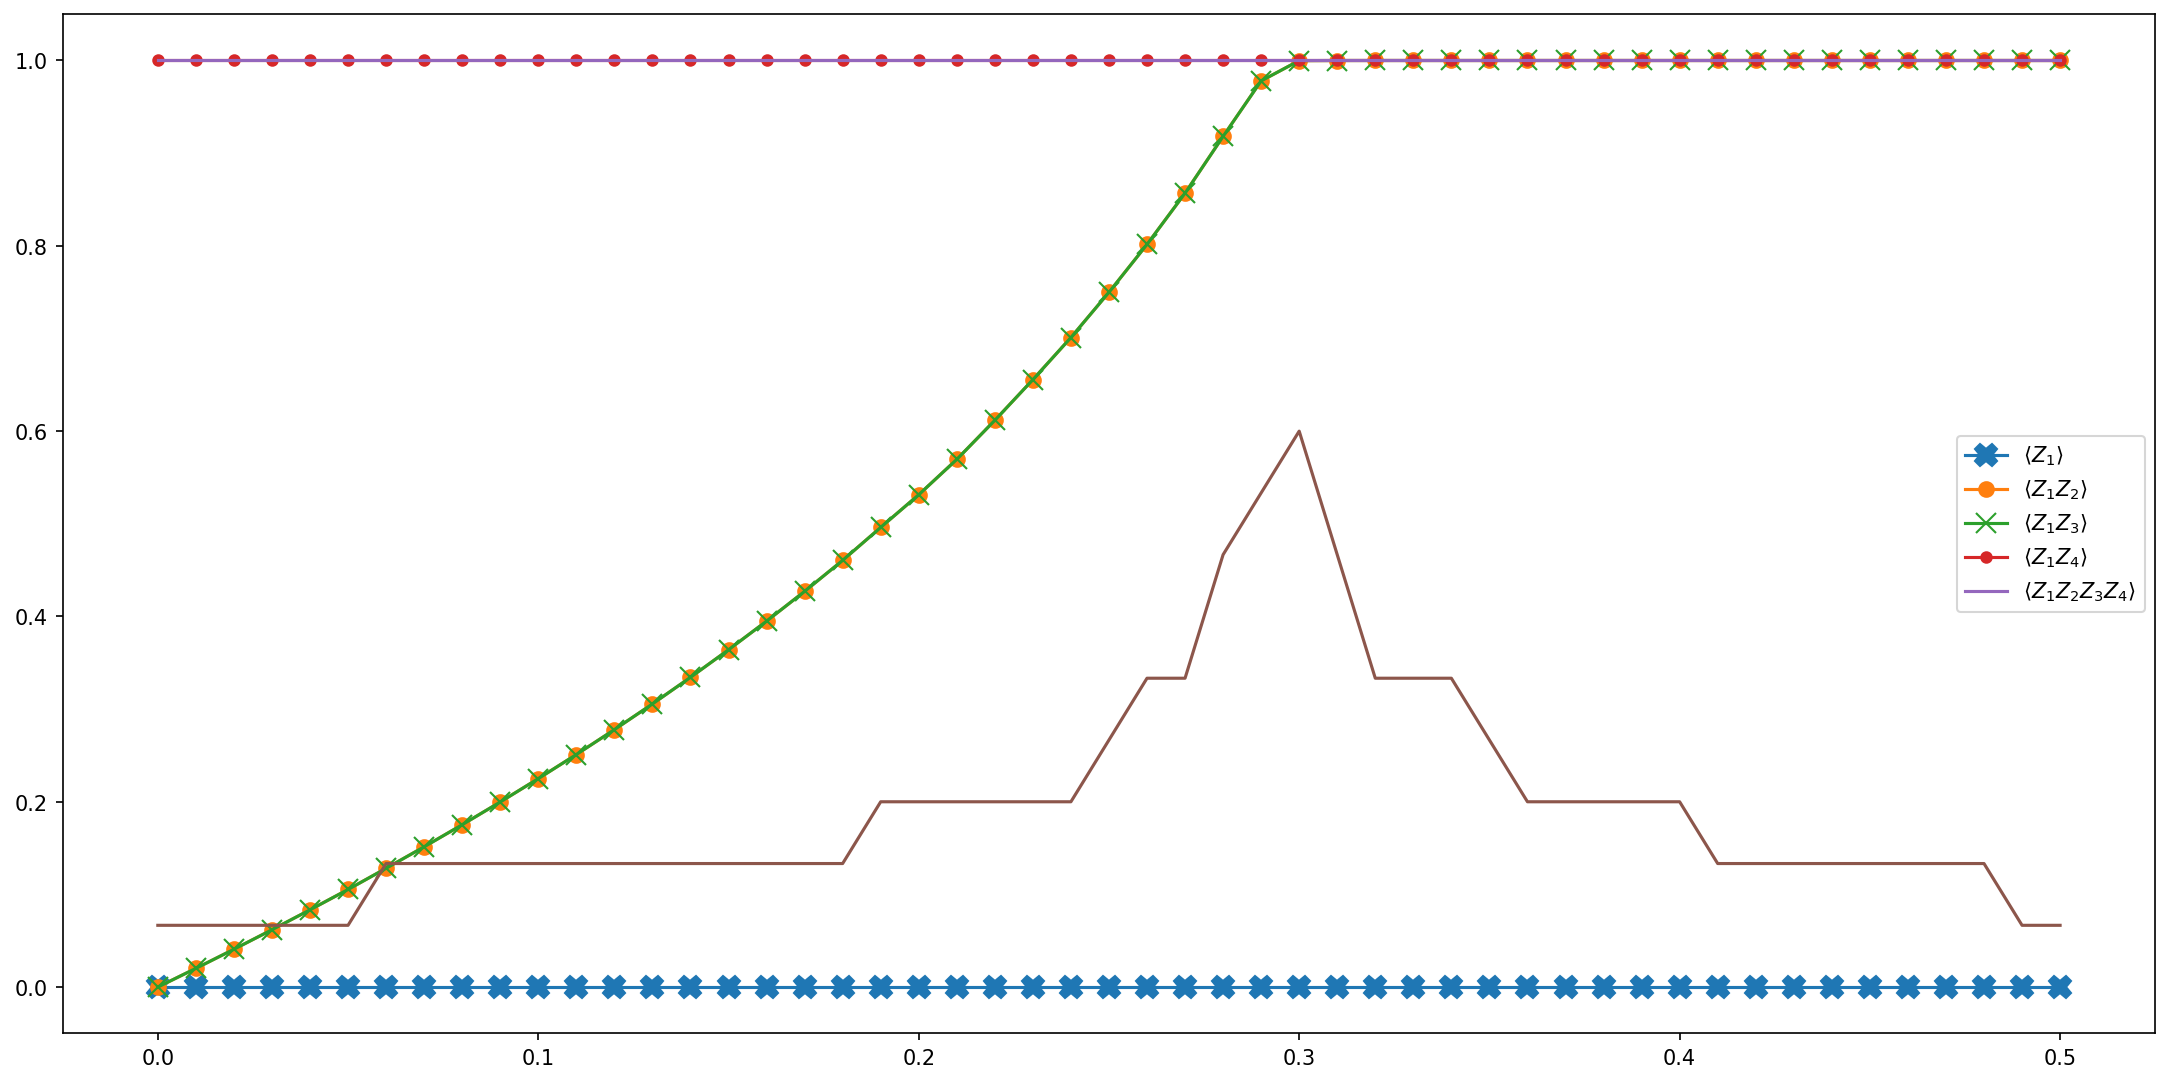

In [24]:
pyplot.figure(figsize=(18,9),dpi = 150)
pyplot.plot(rng,np.abs(lamZ1s),'X-',label = '$\langle Z_1\\rangle$',markersize=11)
pyplot.plot(rng,np.abs(lamZ12s),'o-',label = '$\langle Z_1Z_2 \\rangle$',markersize=7)
pyplot.plot(rng,np.abs(lamZ13s),'x-',label = '$\langle Z_1Z_3\\rangle$',markersize=10)
pyplot.plot(rng,np.abs(lamZ14s),'.-',label = '$\langle Z_1Z_4\\rangle$',markersize=10)
pyplot.plot(rng,np.abs(lamZ1234s),label = '$\langle Z_1Z_2Z_3Z_4\\rangle$')
pyplot.plot(rng,np.array(dims)/15)
pyplot.legend()
pyplot.show()

3 layers

In [2]:
X = np.array([[0,1],[1,0]])
Id = np.eye(2)
X12 = np.zeros([1,1,64,64])
X12[0,0,:,:] = np.kron(X,np.kron(X,np.kron(Id,np.kron(Id,np.kron(Id,Id)))))

X13 = np.zeros([1,1,64,64])
X13[0,0,:,:] = np.kron(X,np.kron(Id,np.kron(X,np.kron(Id,np.kron(Id,Id)))))

X14 = np.zeros([1,1,64,64])
X14[0,0,:,:] = np.kron(X,np.kron(Id,np.kron(Id,np.kron(X,np.kron(Id,Id)))))

X16 = np.zeros([1,1,64,64])
X16[0,0,:,:] = np.kron(X,np.kron(Id,np.kron(Id,np.kron(Id,np.kron(Id,X)))))

X15 = np.zeros([1,1,64,64])
X15[0,0,:,:] = np.kron(X,np.kron(Id,np.kron(Id,np.kron(Id,np.kron(X,Id)))))


MPO16 = iMPS.iMPO()
MPO16.construct_from_tensor_list([X16,X16])

MPO14 = iMPS.iMPO()
MPO14.construct_from_tensor_list([X14,X14])

MPO13 = iMPS.iMPO()
MPO13.construct_from_tensor_list([X13,X13])

MPO12 = iMPS.iMPO()
MPO12.construct_from_tensor_list([X12,X12])

MPO15 = iMPS.iMPO()
MPO15.construct_from_tensor_list([X15,X15])


In [7]:
eigs=[]
lam16s=[]
lam12s=[]
lam13s=[]
lam14s=[]
lam15s=[]
dims=[]

Z = np.array([[1,0],[0,-1]])
X = np.array([[0,1],[1,0]])
A1 = np.array([[0.3,0.2],[-0.2,0.1]])
A3 = np.array([[0.1,0.3],[-0.3,0.2]])
A2 = np.array([[0.1,0.2],[-0.1,0.1]])
B = np.zeros([1,1,64])
B[0,0] =linalg.expm((np.kron(linalg.expm(A1),np.kron(linalg.expm(A2),linalg.expm(A3))))).reshape([64,])

MPS = iMPS.iMPS()
MPS.svd_threshold =1e-10
MPS.max_bond = 10
MPS.construct_from_tensor_list([B,B])

rng = [0.21]
for p in rng:   

    trans = funcs.single_trans_3layers(0.3,'x_flip',0.0,'x_flip',0.3,'x_flip')
    MPO = iMPS.iMPO()
    MPO.construct_from_tensor_list([trans,trans])

    MPS_power2 = iMPS.MPS_power_method_twosite(MPS,MPO,max_bond=10)
    try:
        MPS_power2.update(10,1e-3,1e-3)  
    except:
        print("An exception occurred")
    dims.append(MPS_power2.MPS2.chi[0])
    
    strap = iMPS.strap(MPS_power2.MPS2,MPO12,MPS_power2.MPS2)
    lam12 = strap.calculate_eig()
    
    strap = iMPS.strap(MPS_power2.MPS2,MPO13,MPS_power2.MPS2)
    lam13 = strap.calculate_eig()
    
   
    strap = iMPS.strap(MPS_power2.MPS2,MPO14,MPS_power2.MPS2)
    lam14 = strap.calculate_eig()
    
    strap = iMPS.strap(MPS_power2.MPS2,MPO15,MPS_power2.MPS2)
    lam15 = strap.calculate_eig()
    
    strap = iMPS.strap(MPS_power2.MPS2,MPO16,MPS_power2.MPS2)
    lam16 = strap.calculate_eig()
    
   
    lam12s.append(lam12)
    lam13s.append(lam13)
    lam14s.append(lam14)
    lam16s.append(lam16)
    lam15s.append(lam15)
    print(p)
    print(lam13)
    print(lam15)

An exception occurred
0.21
(0.9887876833779128-6.872284148976257e-17j)
(0.9993434676684113+5.5261077125015746e-18j)


In [6]:
strap = iMPS.strap(MPS_power2.MPS2,MPO12,MPS_power2.MPS2)
lam12 = strap.calculate_eig()
print(lam12)
strap = iMPS.strap(MPS_power2.MPS2,MPO13,MPS_power2.MPS2)
lam13 = strap.calculate_eig()
print(lam13)
strap = iMPS.strap(MPS_power2.MPS2,MPO16,MPS_power2.MPS2)
lam16 = strap.calculate_eig()
print(lam16)

(6.889414454084059e-17-1.0082340213263042e-16j)
(6.889414454084059e-17-1.0082340213263042e-16j)
(1-1.1102230246251565e-16j)


In [10]:
lam1ss=[]
lam12ss=[]
lam13ss=[]
lam14ss=[]
lam15ss=[]
lam16ss=[]
dims=[]

Z = np.array([[1,0],[0,-1]])
X = np.array([[0,1],[1,0]])
A = np.array([[0.3,0.2],[-0.2,0.1]])
B = np.zeros([1,1,64])
B[0,0] =linalg.expm((np.kron(A,np.kron(A,A)))).reshape([64,])

MPS = iMPS.iMPS()
MPS.svd_threshold =1e-10
MPS.max_bond = 10
MPS.construct_from_tensor_list([B,B])

#rng = np.arange(0.,.01,0.04)
for p1 in np.arange(0.2,.5,0.03):   
    
    lam12s=[]
    lam13s=[]
    lam14s=[]
    lam1234s=[]
    lam15s=[]
    lam16s=[]
    for p3 in np.arange(0.3,.5,0.03):
        t1 = time.time()
        trans = funcs.single_trans_3layers(p1=p1,channel1='x_flip',p2=0,channel2='x_flip',p3=p3,channel3='x_flip')
        MPO = iMPS.iMPO()
        MPO.construct_from_tensor_list([trans,trans])

        MPS_power2 = iMPS.MPS_power_method_twosite(MPS,MPO,max_bond=10)
        MPS_power2.update(20,1e-3,1e-3)  
        
        dims.append(MPS_power2.MPS2.chi[0])
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO12,MPS_power2.MPS2)
        lam12 = strap.calculate_eig()
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO13,MPS_power2.MPS2)
        lam13 = strap.calculate_eig()
        
    
        strap = iMPS.strap(MPS_power2.MPS2,MPO14,MPS_power2.MPS2)
        lam14 = strap.calculate_eig()
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO15,MPS_power2.MPS2)
        lam15 = strap.calculate_eig()
        
    
        strap = iMPS.strap(MPS_power2.MPS2,MPO16,MPS_power2.MPS2)
        lam16 = strap.calculate_eig()
        
        
        
    
        lam12s.append(lam12)
        lam13s.append(lam13)
        lam14s.append(lam14)
        lam15s.append(lam15)
        lam16s.append(lam16)
        t2 =  time.time()
        print(p2)
        print(t2-t1)

    lam12ss.append(lam12s)
    lam13ss.append(lam13s)
    lam14ss.append(lam14s)
    lam15ss.append(lam15s)
    lam16ss.append(lam16s)
    print(p1)

KeyboardInterrupt: 

In [ ]:
0.2
(0.999971451253903+4.1069122934320363e-16j)
(0.5330414604372475-6.597053534024763e-16j)

/Users/lizhuan/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/lizhuan/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
No handles with labels found to put in legend.


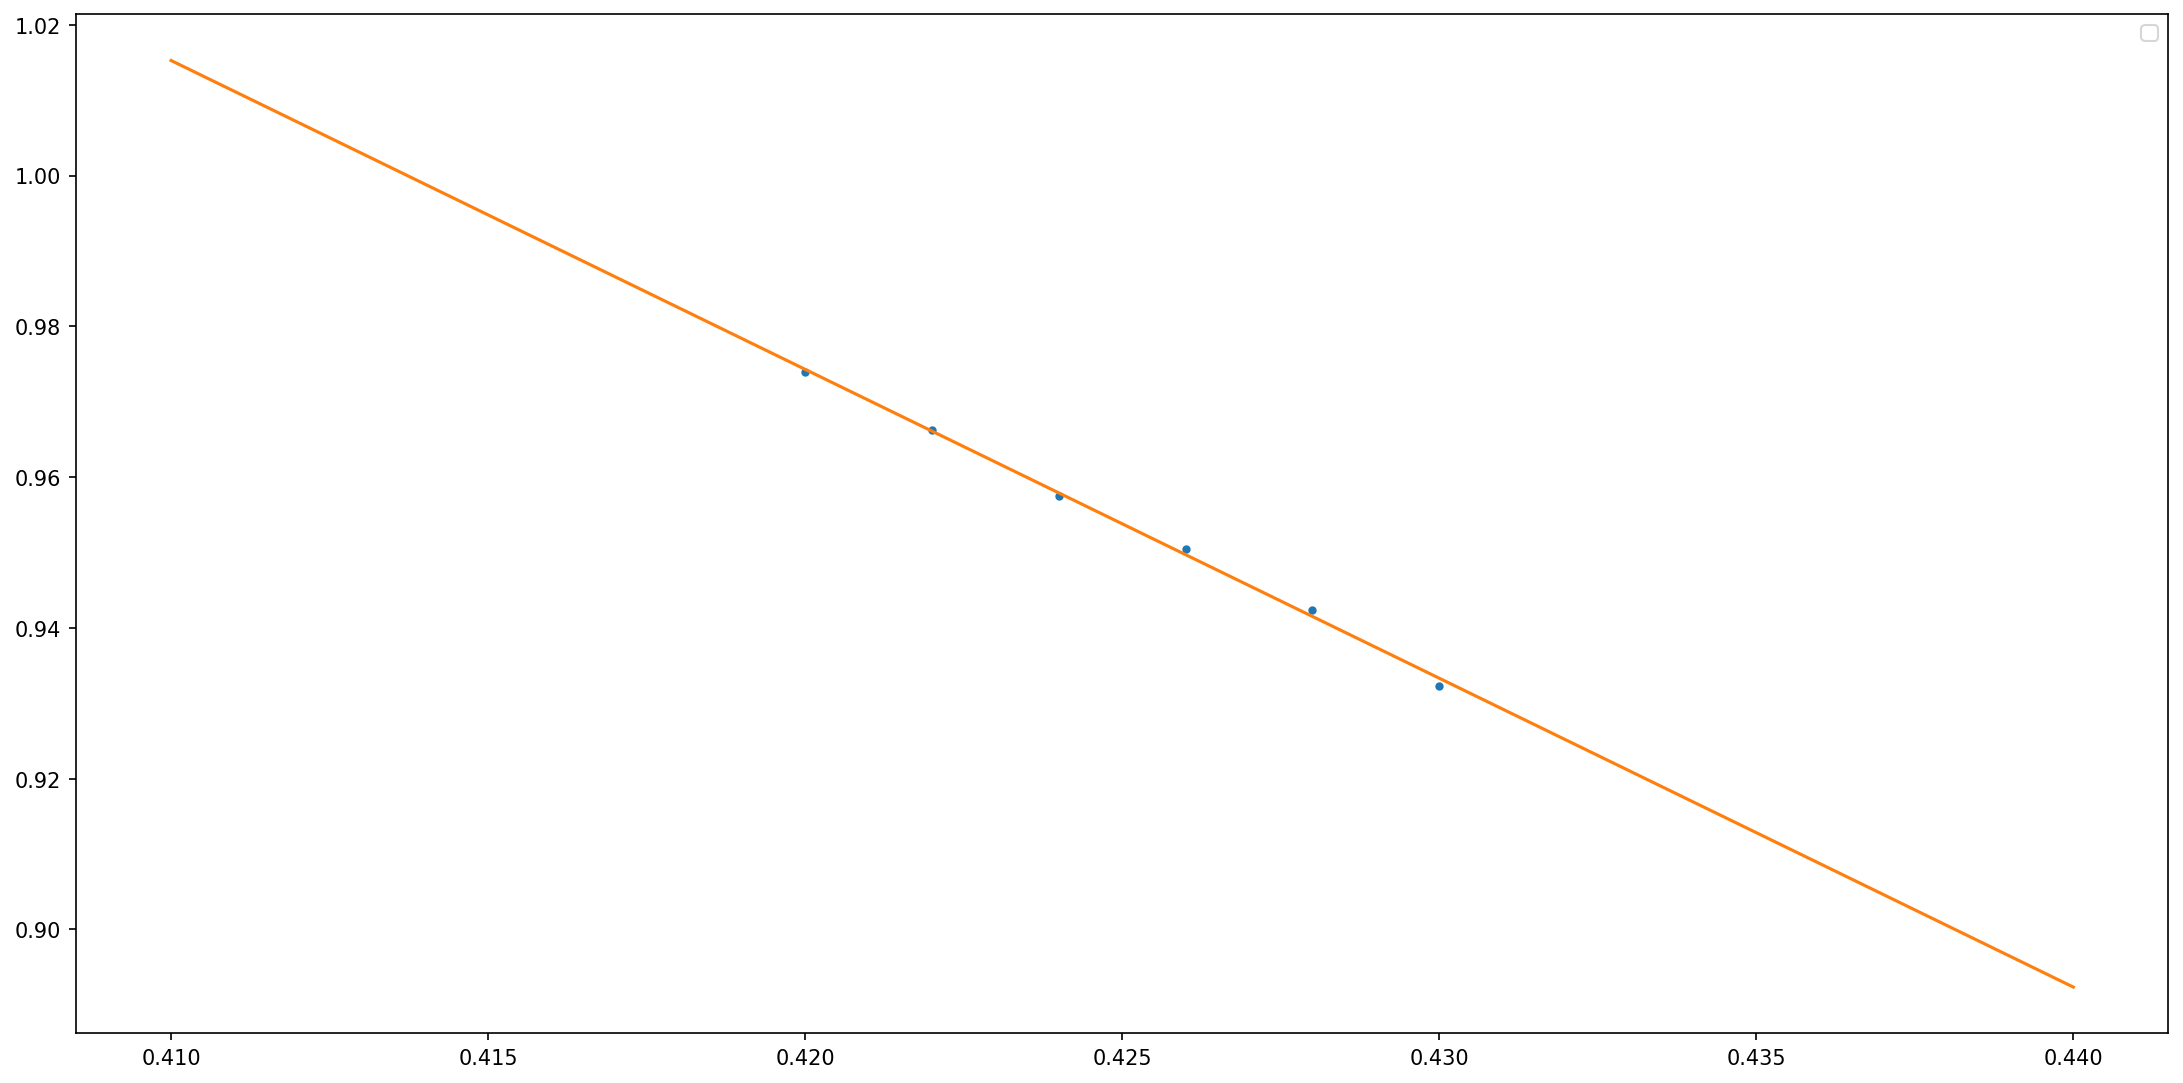

In [8]:
pyplot.figure(figsize=(18,9),dpi = 150)
#pyplot.plot(rng,np.abs(lam12s),'X-',label = '$\langle X_1X_2\\rangle$',markersize=11)
#pyplot.plot(rng,np.abs(lam13s),'o-',label = '$\langle X_1X_3 \\rangle$',markersize=7)
#pyplot.plot(rng,np.abs(lam14s),'x-',label = '$\langle X_1X_4\\rangle$',markersize=10)
#pyplot.plot(rng,np.abs(lam15s),'.-',label = '$\langle X_1X_5\\rangle$',markersize=10)
#pyplot.plot(np.arange(0.42,0.4301,0.002),np.abs(lam16s),'.',label = '$\langle X_1X_6\\rangle$')
pyplot.plot(x,y,'.')
pyplot.plot(np.arange(0.41,0.44,0.01),k*np.arange(0.41,0.44,0.01)+d)
#pyplot.plot(rng,np.array(dims)/10)
pyplot.legend()
pyplot.show()

In [10]:
(1-d)/k

(0.41372865922169333+6.350832483972409e-17j)